# Google Play Store Reviews Sentiment Analysis

### Importing Libraries & Reading The Data
#### NLTK is used for the text sentiment analysis

In [6]:
from itertools import count
from nltk.util import pr
import nltk
nltk.download('vader_lexicon')
import pandas as pd
data = pd.read_csv("GooglePlayStoreReviews.csv")
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bhart\AppData\Roaming\nltk_data...


                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


### Checking for NULL values in the dataset

In [7]:
print(data.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


### Removing the NULL values for accurate visualization

In [8]:
data = data.dropna()
print(data.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


### Adding 3 new columns to the dataset Positive, Negative & Neutral. 

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Translated_Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Translated_Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Translated_Review"]]
print(data.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  Positive  Negative  \
0  Positive                1.00                0.533333     0.534       0.0   
1  Positive                0.25                0.288462     0.519       0.0   
3  Positive                0.40                0.875000     0.451       0.0   
4  Positive                1.00                0.300000     0.677       0.0   
5  Positive                1.00                0.300000     0.808       0.0   

   Neutral  
0    0.466  
1    0.481  
3    0.549 

### Plotting the data

c:\users\bhart\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


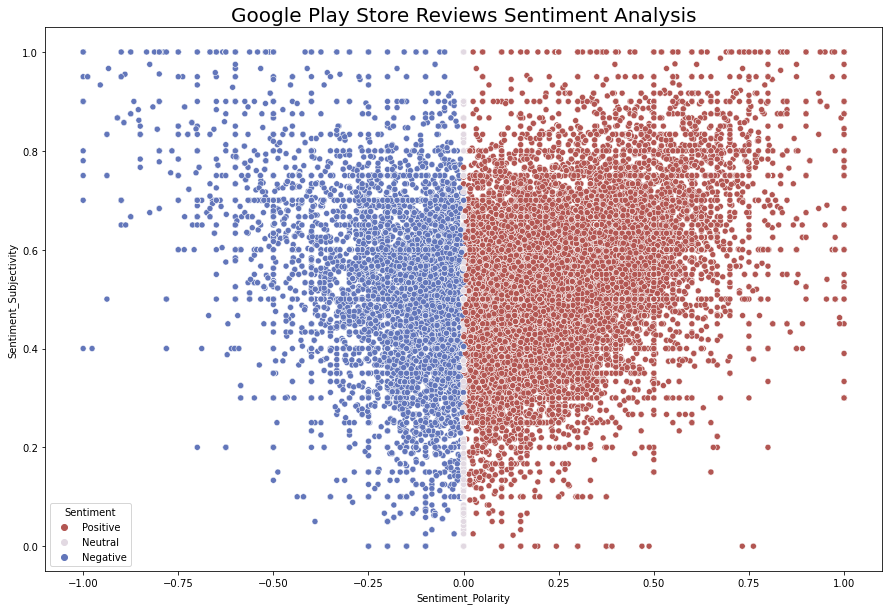

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.scatterplot(data['Sentiment_Polarity'], data['Sentiment_Subjectivity'], 
                hue = data['Sentiment'], edgecolor='white', palette="twilight_shifted_r")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()